In [28]:
import os
import gzip
import json
import pandas as pd
import matplotlib.pyplot as plt

filename = "cnvcka.tsv"
df = pd.read_csv(filename, sep='\t')
df.head()


,#chrom,chromStart,chromEnd,name,score,strand,thickStart,thickEnd,reserved,blockCount,...,guidelines,otherIds,_mouseOver,_clinSignCode,_originCode,_allTypeCode,_varLen,_starCount,_variantId,_dbVarSsvId
0,chr1,16301,166909,nssv584580,0,.,16301,166909,"77,184,255",1,...,NaN,<a target=_blank href='https://www.ncbi.nlm.ni...,GRCh37/hg19 1q21.1(chr1:143134063-143284670)x3...,BN,UNK,GAIN,150608,0,145208,nssv584580
1,chr1,91323,128277,nssv1609094,0,.,91323,128277,"255,98,119",1,...,NaN,<a target=_blank href='https://www.ncbi.nlm.ni...,"GRCh37/hg19 1p36.11(chr1:26930197-26968251)x1,...",LB,UNK,LOSS,36954,0,151336,nssv1609094
2,chr1,629024,8537745,nssv577125,1,.,629024,8537745,"153,0,0",1,...,NaN,<a target=_blank href='https://www.ncbi.nlm.ni...,GRCh38/hg38 1p36.33-36.23(chr1:629025-8537745)...,PG,UNK,LOSS,7908721,1,58242,nssv577125
3,chr1,629043,7008678,nssv577128,1,.,629043,7008678,"153,0,0",1,...,NaN,<a target=_blank href='https://www.ncbi.nlm.ni...,GRCh38/hg38 1p36.33-36.31(chr1:629044-7008678)...,PG,UNK,LOSS,6379635,1,58244,nssv577128
4,chr1,629043,3346226,nssv577127,1,.,629043,3346226,"153,0,0",1,...,NaN,<a target=_blank href='https://www.ncbi.nlm.ni...,GRCh38/hg38 1p36.33-36.32(chr1:629044-3346226)...,PG,UNK,LOSS,2717183,1,58243,nssv577127


In [29]:
directory = 'data/data/annotated_cnvs_json'
dfs = []

for filename in os.listdir(directory)[:15]:
    if filename.endswith('.json.gz'):
        file_path = os.path.join(directory, filename)

        with gzip.open(file_path, 'rb') as f:
            file_content = f.read().decode('utf-8')

        data = json.loads(file_content)
        genes_df = pd.json_normalize(data, 'genes', sep='_')
        main_df = pd.json_normalize(data, sep='_')
        result_df = pd.concat([main_df, genes_df], axis=1)
        dfs.append(result_df)

df = pd.concat(dfs, ignore_index=True)

df.head(15)

,chrom,start,end,cnv_type,genes,Pathway(ConsensusPathDB)_imputed_unscaled,Pathway(ConsensusPathDB)_imputed_scaled,Pathway(ConsensusPathDB)_unimputed_unscaled,Pathway(ConsensusPathDB)_raw,Function_description_imputed_unscaled,...,Essential_gene_gene-trap_N_unimputed_unscaled,Essential_gene_gene-trap_N_raw,Gene_indispensability_pred_E_imputed_unscaled,Gene_indispensability_pred_E_imputed_scaled,Gene_indispensability_pred_E_unimputed_unscaled,Gene_indispensability_pred_E_raw,Gene_indispensability_pred_N_imputed_unscaled,Gene_indispensability_pred_N_imputed_scaled,Gene_indispensability_pred_N_unimputed_unscaled,Gene_indispensability_pred_N_raw
0,10,100194214.0,132432797.0,gain,[{'Pathway(ConsensusPathDB)': {'imputed_unscal...,1,1,1,PI3K-Akt signaling pathway - Homo sapiens (hum...,1,...,1.0,N,1.0,1.0,1.0,E,0.0,0.0,0.0,E
1,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,0,...,0.0,NaN,0.0,0.0,0.0,N,1.0,1.0,1.0,N
2,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,1,...,1.0,N,0.0,0.0,0.0,N,1.0,1.0,1.0,N
3,NaN,NaN,NaN,NaN,NaN,1,1,1,Taste transduction - Homo sapiens (human),1,...,1.0,N,1.0,1.0,1.0,E,0.0,0.0,0.0,E
4,NaN,NaN,NaN,NaN,NaN,1,1,1,Biosynthesis of unsaturated fatty acids - Homo...,1,...,0.0,E,1.0,1.0,1.0,E,0.0,0.0,0.0,E
5,NaN,NaN,NaN,NaN,NaN,1,1,1,Gastric cancer - Homo sapiens (human);mTOR sig...,1,...,1.0,N,0.0,0.0,0.0,N,1.0,1.0,1.0,N
6,NaN,NaN,NaN,NaN,NaN,1,1,1,Protein processing in endoplasmic reticulum - ...,1,...,1.0,N,0.0,0.0,0.0,N,1.0,1.0,1.0,N
7,NaN,NaN,NaN,NaN,NaN,1,1,1,Retrograde endocannabinoid signaling - Homo sa...,1,...,1.0,N,1.0,1.0,1.0,E,0.0,0.0,0.0,E
8,NaN,NaN,NaN,NaN,NaN,1,1,1,Glutaminolysis and Cancer;miR-148a-miR-31-FIH1...,1,...,1.0,N,1.0,1.0,1.0,E,0.0,0.0,0.0,E
9,NaN,NaN,NaN,NaN,NaN,1,1,1,Primary Focal Segmental Glomerulosclerosis FSG...,1,...,1.0,N,1.0,1.0,1.0,E,0.0,0.0,0.0,E


In [38]:
selected_attributes_df = df[['HIPred_score_imputed_unscaled', 'ExAC_pRec_imputed_unscaled']]
selected_attributes_df.head(15)

,HIPred_score_imputed_unscaled,ExAC_pRec_imputed_unscaled
0,0.773706,0.001296
1,0.195843,0.626391
2,0.513524,0.865610
3,0.250911,0.050453
4,0.736612,0.112351
5,0.875350,0.509432
6,0.247952,0.001047
7,0.163354,0.636317
8,0.782961,0.132231
9,0.791830,0.878654


In [31]:
df.columns

Index(['chrom', 'start', 'end', 'cnv_type', 'genes',
       'Pathway(ConsensusPathDB)_imputed_unscaled',
       'Pathway(ConsensusPathDB)_imputed_scaled',
       'Pathway(ConsensusPathDB)_unimputed_unscaled',
       'Pathway(ConsensusPathDB)_raw', 'Function_description_imputed_unscaled',
       ...
       'Essential_gene_gene-trap_N_unimputed_unscaled',
       'Essential_gene_gene-trap_N_raw',
       'Gene_indispensability_pred_E_imputed_unscaled',
       'Gene_indispensability_pred_E_imputed_scaled',
       'Gene_indispensability_pred_E_unimputed_unscaled',
       'Gene_indispensability_pred_E_raw',
       'Gene_indispensability_pred_N_imputed_unscaled',
       'Gene_indispensability_pred_N_imputed_scaled',
       'Gene_indispensability_pred_N_unimputed_unscaled',
       'Gene_indispensability_pred_N_raw'],
      dtype='object', length=377)

In [32]:
merged_df = pd.merge(result_df, df, left_on=['chrom', 'start', 'end'], right_on=['chrom', 'start', 'end'], how='outer')

merged_df

,chrom,start,end,cnv_type_x,genes_x,Pathway(ConsensusPathDB)_imputed_unscaled_x,Pathway(ConsensusPathDB)_imputed_scaled_x,Pathway(ConsensusPathDB)_unimputed_unscaled_x,Pathway(ConsensusPathDB)_raw_x,Function_description_imputed_unscaled_x,...,Essential_gene_gene-trap_N_unimputed_unscaled_y,Essential_gene_gene-trap_N_raw_y,Gene_indispensability_pred_E_imputed_unscaled_y,Gene_indispensability_pred_E_imputed_scaled_y,Gene_indispensability_pred_E_unimputed_unscaled_y,Gene_indispensability_pred_E_raw_y,Gene_indispensability_pred_N_imputed_unscaled_y,Gene_indispensability_pred_N_imputed_scaled_y,Gene_indispensability_pred_N_unimputed_unscaled_y,Gene_indispensability_pred_N_raw_y
0,10,101528553.0,101556158.0,gain,[{'Pathway(ConsensusPathDB)': {'imputed_unscal...,1.0,1.0,1.0,Circadian rhythm - Homo sapiens (human);Oocyte...,1.0,...,1.0,N,1.0,1.0,1.0,E,0.0,0.0,0.0,E
1,10,100194214.0,132432797.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,N,1.0,1.0,1.0,E,0.0,0.0,0.0,E
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,0.0,0.0,0.0,N,1.0,1.0,1.0,N
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,N,0.0,0.0,0.0,N,1.0,1.0,1.0,N
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,N,1.0,1.0,1.0,E,0.0,0.0,0.0,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,10,101370486.0,101583324.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,N,1.0,1.0,1.0,E,0.0,0.0,0.0,E
449,10,101416271.0,101689575.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,N,1.0,1.0,1.0,E,0.0,0.0,0.0,E
450,10,101434985.0,101689541.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,N,1.0,1.0,1.0,E,0.0,0.0,0.0,E
451,10,101492027.0,101682260.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,N,1.0,1.0,1.0,E,0.0,0.0,0.0,E


In [34]:
merged_df.columns

Index(['chrom', 'start', 'end', 'cnv_type_x', 'genes_x',
       'Pathway(ConsensusPathDB)_imputed_unscaled_x',
       'Pathway(ConsensusPathDB)_imputed_scaled_x',
       'Pathway(ConsensusPathDB)_unimputed_unscaled_x',
       'Pathway(ConsensusPathDB)_raw_x',
       'Function_description_imputed_unscaled_x',
       ...
       'Essential_gene_gene-trap_N_unimputed_unscaled_y',
       'Essential_gene_gene-trap_N_raw_y',
       'Gene_indispensability_pred_E_imputed_unscaled_y',
       'Gene_indispensability_pred_E_imputed_scaled_y',
       'Gene_indispensability_pred_E_unimputed_unscaled_y',
       'Gene_indispensability_pred_E_raw_y',
       'Gene_indispensability_pred_N_imputed_unscaled_y',
       'Gene_indispensability_pred_N_imputed_scaled_y',
       'Gene_indispensability_pred_N_unimputed_unscaled_y',
       'Gene_indispensability_pred_N_raw_y'],
      dtype='object', length=751)

In [43]:
final_df = merged_df[[ 'chrom', 'start', 'end', 'HIPred_score_imputed_unscaled_y', 'ExAC_pRec_imputed_unscaled_y']]
#final_df = final_df.dropna()
final_df

,chrom,start,end,HIPred_score_imputed_unscaled_y,ExAC_pRec_imputed_unscaled_y
0,10,101528553.0,101556158.0,0.764717,0.136832
1,10,100194214.0,132432797.0,0.773706,0.001296
2,NaN,NaN,NaN,0.195843,0.626391
3,NaN,NaN,NaN,0.513524,0.865610
4,NaN,NaN,NaN,0.250911,0.050453
...,...,...,...,...,...
448,10,101370486.0,101583324.0,0.764717,0.136832
449,10,101416271.0,101689575.0,0.764717,0.136832
450,10,101434985.0,101689541.0,0.764717,0.136832
451,10,101492027.0,101682260.0,0.764717,0.136832


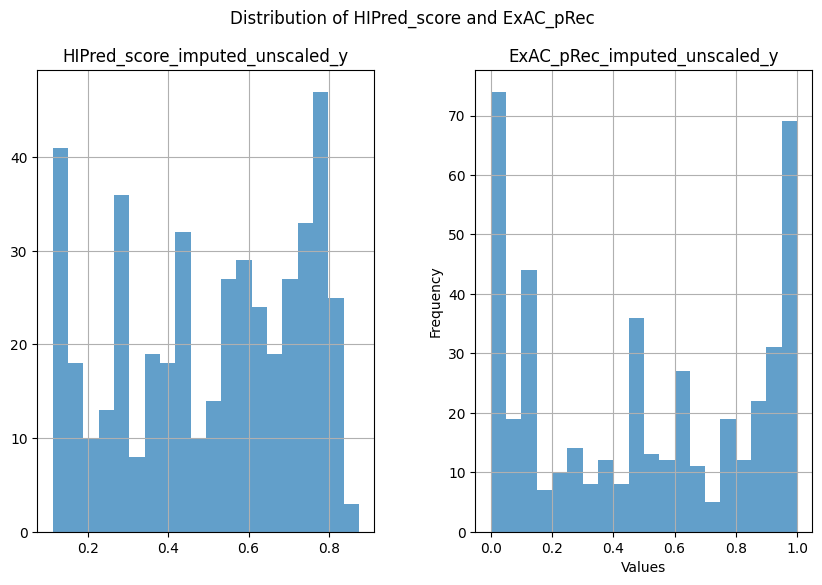

In [46]:
selected_df = final_df[['HIPred_score_imputed_unscaled_y', 'ExAC_pRec_imputed_unscaled_y']]

selected_df.hist(figsize=(10, 6), bins=20, alpha=0.7)
plt.suptitle('Distribution of HIPred_score and ExAC_pRec')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()